# En Este notebook se generará un modelo de clasificación con una Regresión Logística solo con las variables más influyentes para el modelo

In [14]:
# Importamos las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Insertamos esta línea de código para que los números aparezcan separados por comas

pd.options.display.float_format = "{:,.2f}".format

In [3]:
# Cargamos los datos

datos = pd.read_csv("../datos_escalados.csv")

In [4]:
# Vemos que siga la consistencia con el número de columnas y filas

print(datos.shape)
datos.head(2)

(7032, 46)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.00,0.00,0.12,0.00,0.00,1.00,0.00,0.00,1.00,1.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,0.00,0.46,0.39,0.22,0.00,0.00,1.00,1.00,0.00,1.00,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


## Dividimos el data set en entrenamiento y testing

In [6]:
# Elejimos  las variables más influyentes para el entrenamiento

X_1 = datos[["TotalCharges", "Contract_Month-to-month", "InternetService_Fiber optic", "OnlineSecurity_No",
              "TechSupport_No", "PaymentMethod_Electronic check", "SeniorCitizen", "StreamingMovies_Yes",
              "StreamingTV_Yes", "Dependents_No", "tenure"]]
y_1 = datos["Churn"].values

In [7]:
# Separamos en entrenamiento y prueba con train split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 42)

In [8]:
# Generamos el modelo de regresión Logística

modelo_1 = LogisticRegression()
resultado_1 = modelo_1.fit(X_train_1, y_train_1)

In [9]:
# Medimos el accuracy

predicciones_testing_1 = modelo_1.predict(X_test_1)
accuracy_1 = (metrics.accuracy_score(y_test_1, predicciones_testing_1))

print("El accuracy del modelo es de " + str(accuracy_1*100) + "%"  )

El accuracy del modelo es de 79.5260663507109%


In [10]:
# Generamos la matriz de confusión

matriz_confusion = confusion_matrix(y_test_1, predicciones_testing_1)

<AxesSubplot:>

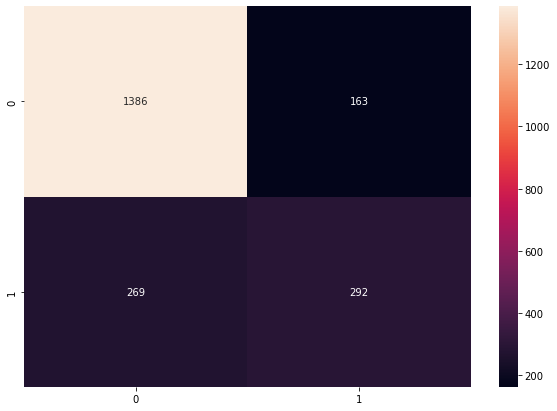

In [11]:
# Hacemos la gráfica de la matriz de confusión

plt.figure(figsize = (10,7))
sns.heatmap(matriz_confusion, annot=True, fmt='g')

In [15]:
# Revisamos otras métricas como recall y F1

predicciones = modelo_1.predict(X_test_1).reshape(-1,1)
print(classification_report(y_test_1, predicciones))


              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.52      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

